In [1]:
# From Chapter 1
import numpy as np
import sounddevice as sd
%matplotlib inline
import matplotlib.pyplot as plt


fs = 8000      # Sampling frequency CD rates at 44100 (44.1 kHz)
A_freq = 440   # This is a ISO standard

def create_sound(f, duration):    
    t = np.linspace(0, duration, fs * duration)
    
    note = np.cos(2 * np.pi * f * t)  # base note
    for i in range(2, 6):
        note += 0.3 / i * np.cos(i * 2 * np.pi * f * t)  #  sine(2*pi*f*t)
    return note

In [2]:
# From Chapter 2
freq_dict = {}
k = 2.0**(1.0/12.0)
fa = 440
f0 = fa / (k ** 9)

notes = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#",  "B", "C^"]

for i, note in enumerate(notes, start=0):
    freq_dict[note] = (k**i) * f0

In [3]:
# Little little twinkle star
sheet = [("C", 1), ("C", 1), ("G", 1), ("G", 1), ("A", 1), ("A", 1), ("G", 1.5)]

music = np.array([])
for note, duration in sheet:
    music = np.append(music, create_sound(freq_dict[note], duration))
    
sd.play(music, fs)
    

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


In [6]:
# Write your song.
sheet = [("G", 1), ("E", 1), ("E", 1), ("F", 1), ("D", 1), ("D", 1), ("C", 1), ("D", 1), ("E", 1), ("F", 1), ("G", 1), ("G", 1), ("G", 2), ("G", 1), ("E", 1), ("E", 1), ("F", 1), ("D", 1), ("D", 1), ("C", 1), ("E", 1), ("G", 1), ("G", 1), ("C", 2)]

music1 = np.array([])
for note, duration in sheet:
    music1 = np.append(music1, create_sound(freq_dict[note], duration * 0.5))
    
sd.play(music1, fs)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


In [7]:
# Listen to some EEG signal, what does it sound like
import pickle

# open a file, where you stored the pickled data
eeg_file = open('./res/meditation_focus.pickle', 'rb')

# dump information to that file
eeg_data = pickle.load(eeg_file)

print(eeg_data)

       meditation      focus
0       25.076230  -9.866714
1       27.713776  -8.535703
2       19.957860  -9.550095
3       17.336845  -1.166344
4       12.706757  -9.102503
5       13.113658  -8.599917
6       10.162989 -13.710658
7       -0.671705 -15.251795
8      -12.285233 -19.305865
9      -10.290146 -13.425509
10     -15.782992  -4.635811
11     -14.072100  -7.766406
12      -8.178711   3.706932
13      -9.423256   1.510620
14      -5.266507   1.483599
15      -5.777359   5.248070
16      -8.450190   6.303787
17       3.901800   6.411235
18       4.276594   4.202843
19      -0.316938  -0.155767
20      -3.347079  17.340978
21     -10.612488   9.644826
22      -6.012917  13.786952
23      -7.869085  11.700630
24     -11.643410  16.212781
25     -11.082649  14.085452
26      -7.165591   0.458717
27      -2.320608  -7.870356
28      -2.466520 -24.426460
29       5.037944 -33.313751
...           ...        ...
28609  -22.641500  -9.081523
28610  -22.020658 -10.881424
28611  -14.935

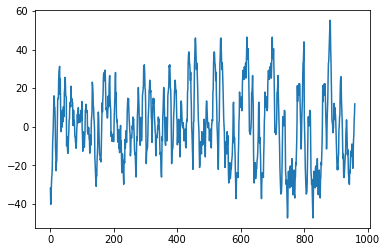

In [10]:
meditation = np.array(eeg_data["meditation"])

normal_denom = np.max(np.abs(meditation))

plt.plot(meditation[960:1920])

meditation /= normal_denom

sd.play(meditation, fs)



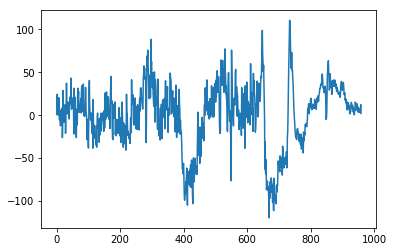

In [11]:
focus = np.array(eeg_data["focus"])

plt.plot(focus[960:1920])

focus /= normal_denom

sd.play(focus, fs)

In [ ]:
# Write your file as a wav file
from scipy.io import wavfile

def write_wav(filename_no_ext, fs, sound):
    wavfile.write(filename_no_ext + '.wav', fs, sound)

# All workshop material available online at 
[https://github.com/adis300/py-music](https://github.com/adis300/py-music)

<img src="./img/repo_address.png" />